In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Data\heart_failure_clinical_records_dataset.csv")

In [5]:
df.shape

(299, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


What is the distribution of age among heart failure patients in the dataset?

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


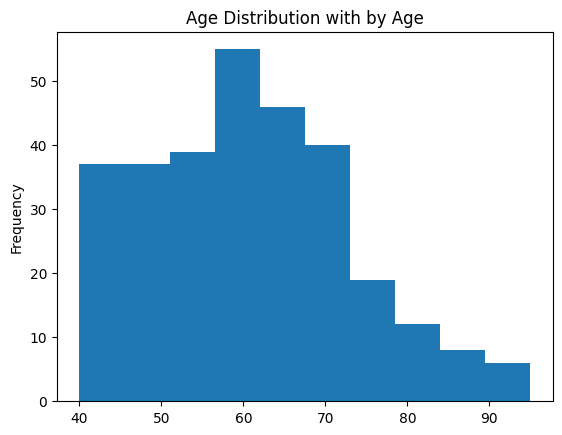

In [9]:
df['age'].plot(kind='hist', bins = 10)
plt.title('Age Distribution with by Age')
plt.show()

Here we clearly obserbing that age is distributed from 40 to 95

How does the death rate vary with age?

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [11]:
age_bins = [40, 50, 60, 70, 80, 90] #Creating age group
df['age_group'] = pd.cut(df['age'], bins=age_bins, right=False)

# Calculate the death rate within each age group
death_rate_by_age_group = df.groupby('age_group')['DEATH_EVENT'].mean() * 100  # Convert to percentage

# Display the death rates
print(death_rate_by_age_group)


age_group
[40, 50)    23.404255
[50, 60)    24.390244
[60, 70)    29.032258
[70, 80)    38.461538
[80, 90)    68.421053
Name: DEATH_EVENT, dtype: float64


What is the percentage of male and female patients in the dataset?

In [12]:
# Calculate the percentage of male and female patients
gender_distribution = df['sex'].value_counts(normalize=True) * 100

# Map the 'sex' column: 1 for male, 0 for female
gender_distribution.index = ['Male' if x == 1 else 'Female' for x in gender_distribution.index]

# Display the gender distribution
print(gender_distribution)

Male      64.882943
Female    35.117057
Name: proportion, dtype: float64


How does the platelet count vary among different age groups

In [13]:
age_bins = [40, 50, 60, 70, 80, 90] #Creating age group
df['age_group'] = pd.cut(df['age'], bins=age_bins, right=False)

# Calculate the platelet count within each age group
platelet_count_by_age_group = df.groupby('age_group')['platelets'].mean() * 100  # Convert to percentage

# Display the platelet count
print(platelet_count_by_age_group)

age_group
[40, 50)    2.859317e+07
[50, 60)    2.650018e+07
[60, 70)    2.489908e+07
[70, 80)    2.670363e+07
[80, 90)    2.522482e+07
Name: platelets, dtype: float64


> Is there a correlation between creatinine and sodium levels in the blood?

In [15]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_group'],
      dtype='object')

In [19]:
correlation_matrix = df[['creatinine_phosphokinase','serum_creatinine','serum_sodium']].corr()
print(correlation_matrix)

                          creatinine_phosphokinase  serum_creatinine  \
creatinine_phosphokinase                  1.000000         -0.016408   
serum_creatinine                         -0.016408          1.000000   
serum_sodium                              0.059550         -0.189095   

                          serum_sodium  
creatinine_phosphokinase      0.059550  
serum_creatinine             -0.189095  
serum_sodium                  1.000000  


<Axes: >

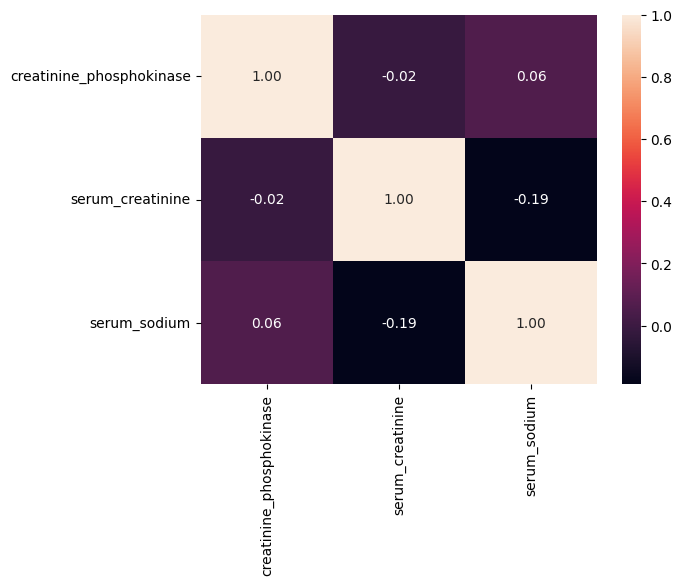

In [21]:
sns.heatmap(correlation_matrix,annot=True, fmt=".2f")

How does the prevalence of high blood pressure differ between male and female patients?

In [22]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,"[70, 80)"
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,"[50, 60)"
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,"[60, 70)"


In [32]:
prevalence_male = df[df['sex'] == 1]['high_blood_pressure'].mean()
prevalence_female = df[df['sex'] == 0]['high_blood_pressure'].mean()

# Print the results
print("Prevalence of high blood pressure in males:", prevalence_male)
print("Prevalence of high blood pressure in females:", prevalence_female)

Prevalence of high blood pressure in males: 0.31443298969072164
Prevalence of high blood pressure in females: 0.41904761904761906


7. What is the relationship between smoking habits and the occurrence of heart failure?

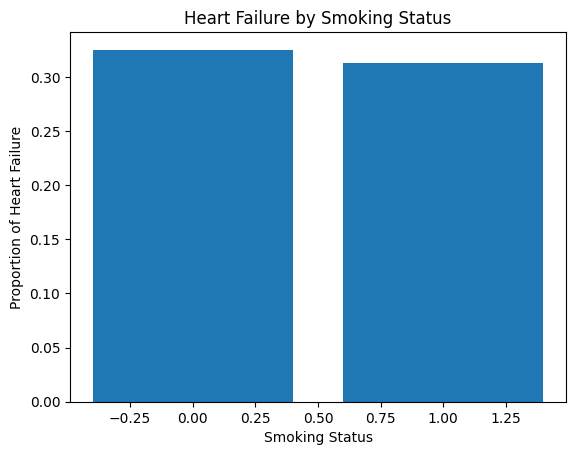

In [33]:
# Group by smoking status and calculate the proportion of heart failure cases
smoking_groups = df.groupby('smoking')['DEATH_EVENT'].mean()

# Plot the results
plt.bar(smoking_groups.index, smoking_groups.values)
plt.xlabel('Smoking Status')
plt.ylabel('Proportion of Heart Failure')
plt.title('Heart Failure by Smoking Status')
plt.show()

8. Are there any noticeable patterns in the distribution on death events across differrnt age groups?

In [35]:
death_rates = df.groupby('age_group')['DEATH_EVENT'].mean()

death_rates

age_group
[40, 50)    0.234043
[50, 60)    0.243902
[60, 70)    0.290323
[70, 80)    0.384615
[80, 90)    0.684211
Name: DEATH_EVENT, dtype: float64

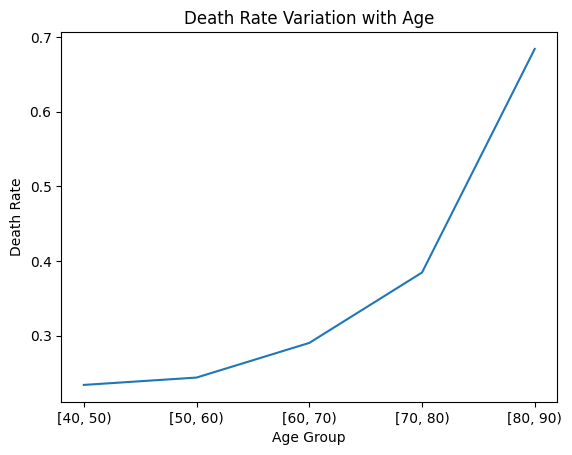

In [37]:
# Plot the results
plt.plot(death_rates.index.astype(str), death_rates.values)
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.title('Death Rate Variation with Age')
plt.show()

In [ ]:
9.  Is there any significant difference in ejection fraction between patients with and without diabetes?

In [38]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_group'],
      dtype='object')

In [44]:
from scipy import stats

# Group data by diabetes status and calculate mean ejection fraction
ef_by_diabetes = df.groupby('diabetes')['ejection_fraction'].mean()

# Perform a t-test to compare means with unequal variance
t_statistic, p_value = stats.ttest_ind(df[df['diabetes'] == 1]['ejection_fraction'],
                                       df[df['diabetes'] == 0]['ejection_fraction'],
                                       equal_var=False)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -0.08472126448808373
P-value: 0.9325436826526667


10. How does the serum creatinine level vary between patients who survived and those who did not?

Statistics for Survived Patients:
count    203.000000
mean       1.184877
std        0.654083
min        0.500000
25%        0.900000
50%        1.000000
75%        1.200000
max        6.100000
Name: serum_creatinine, dtype: float64

Statistics for Not Survived Patients:
count    96.000000
mean      1.835833
std       1.468562
min       0.600000
25%       1.075000
50%       1.300000
75%       1.900000
max       9.400000
Name: serum_creatinine, dtype: float64


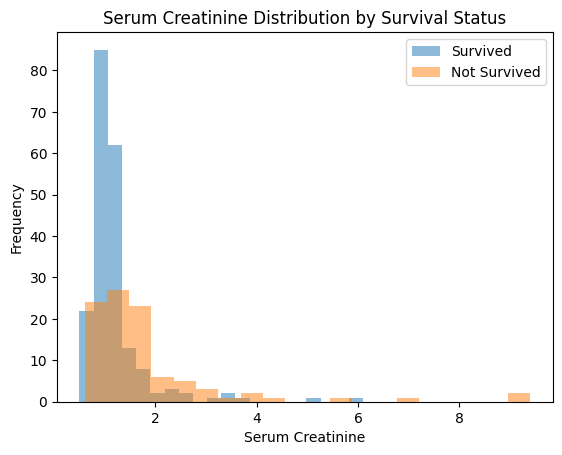

In [45]:
# Group the data by survival status and calculate descriptive statistics for serum creatinine
survived_serum_creatinine = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
not_survived_serum_creatinine = df[df['DEATH_EVENT'] == 1]['serum_creatinine']

survived_stats = survived_serum_creatinine.describe()
not_survived_stats = not_survived_serum_creatinine.describe()

# Print the descriptive statistics
print("Statistics for Survived Patients:")
print(survived_stats)

print("\nStatistics for Not Survived Patients:")
print(not_survived_stats)

# Visualize the distribution
plt.hist(survived_serum_creatinine, label='Survived', alpha=0.5, bins=20)
plt.hist(not_survived_serum_creatinine, label='Not Survived', alpha=0.5, bins=20)
plt.xlabel('Serum Creatinine')
plt.ylabel('Frequency')
plt.legend()
plt.title('Serum Creatinine Distribution by Survival Status')
plt.show()